Import the required libraries

In [115]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [116]:
print(cv2.__version__)

4.6.0


In [117]:
# Display image
def display(original, result, title1 = 'Input', title2 = 'Output'):
    plt.figure(figsize=(15, 10))
    #Original
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    #Result
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title(title2)
    plt.axis('off')

# Task 1

In [118]:
task1_org = cv2.imread('Task1.jpg', cv2.IMREAD_GRAYSCALE)
inversion = 255 - task1_org

In [119]:
gamma = 0.4
invGamma = 1.0 / gamma
table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
output = cv2.LUT(inversion, table)

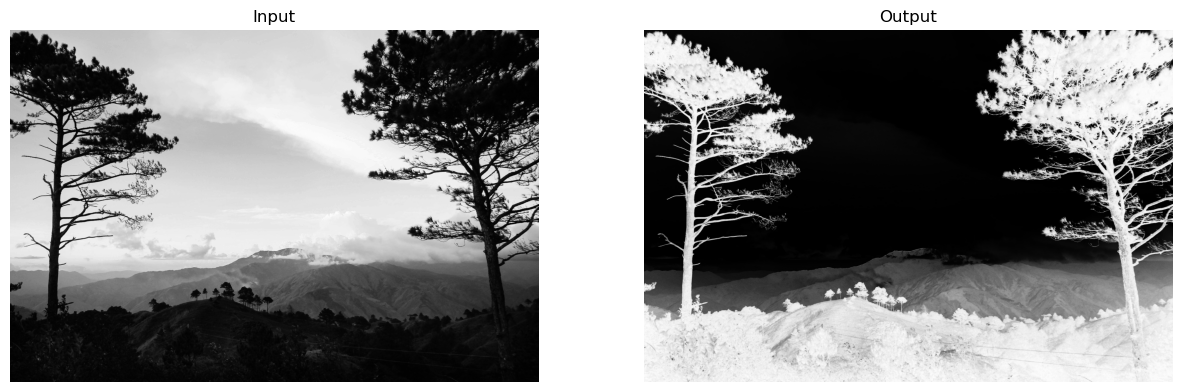

In [120]:
display(task1_org, output)

# Task 2

In [121]:
task2_org = cv2.imread('Task2.jpg', cv2.IMREAD_GRAYSCALE)

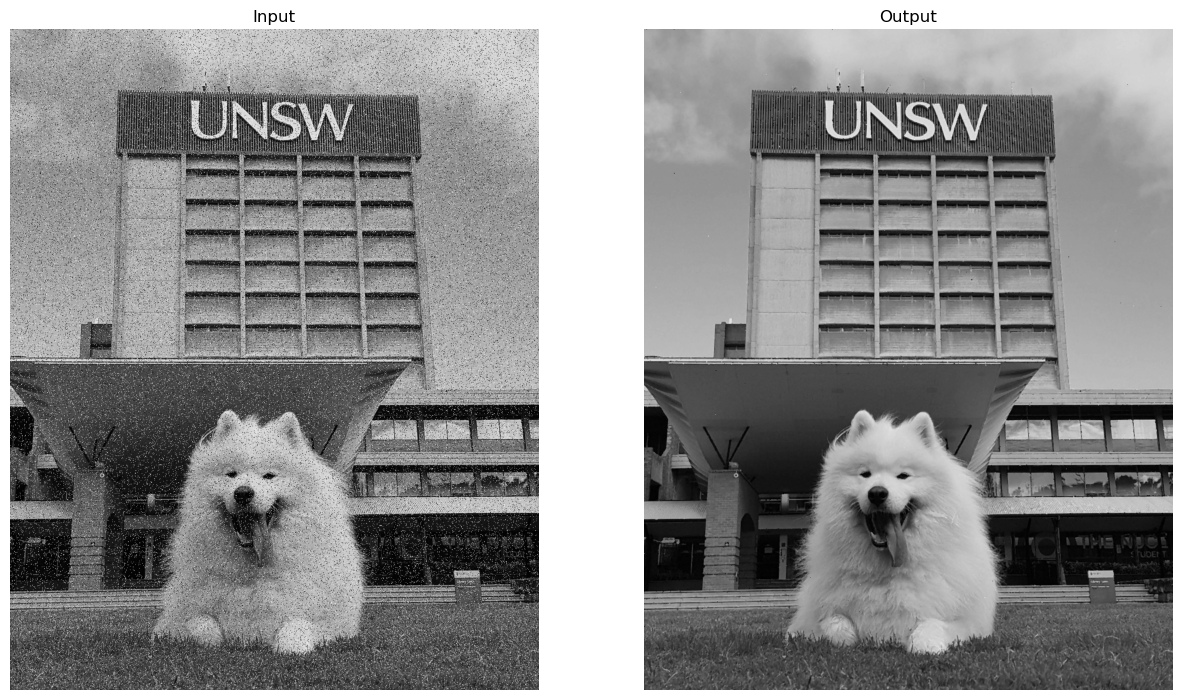

In [122]:
median = cv2.medianBlur(task2_org, 3)
display(task2_org, median)

I'm using median filter for this question, since it's result is best comparing with uniform and gaussian filters.

For the reason I guess is that the noises in the picture are uniformly distributed; and it's not occupy the largest part. And the main content of the pictures is clear thus makes median filters perform the best in the task.

# Task 3

In [165]:
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

In [177]:
task3_org = cv2.imread('Task3.jpg', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.filter2D(task3_org, ddepth=cv2.CV_64F, kernel=kernel)
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

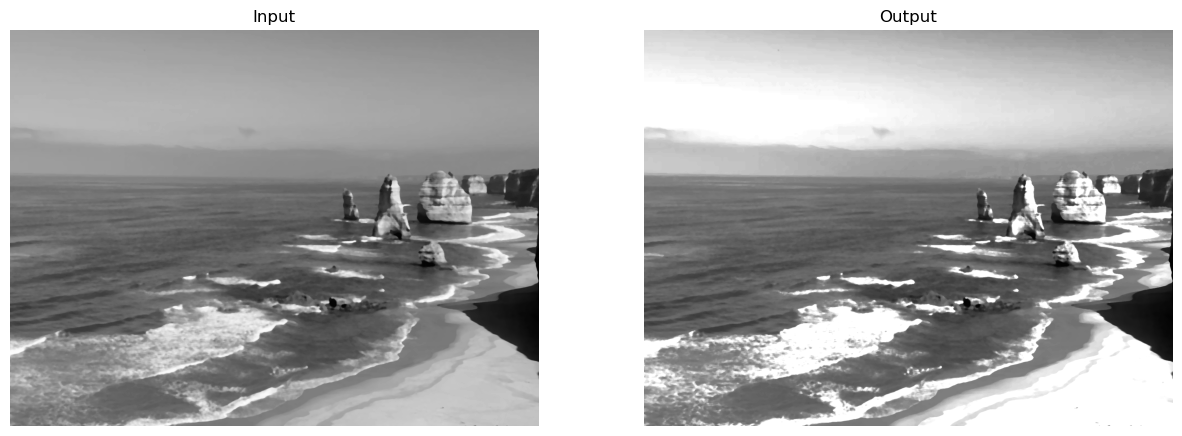

In [181]:
layer = cv2.subtract(task3_org, laplacian) * 1.6
layer = layer.round(0).astype(np.uint8)

output = cv2.add(task3_org, layer)
display(task3_org, output)

The sharping method I'm using is unsharp masking, I'm using laplacian filter go the outline of the picture first, then add the original picture and the outline then got the clear picture as the result.

About why this is the right choice:
The Laplacian filter enhances strong edges even in relatively low-contrast regions. If the blur in the image is quite noticeable, Laplacian filtering may provide a more effective way of recovering edge detail.